# Final project 
## 1531036005 김동효

# 1.가우시안 분류

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import cPickle
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.learning_curve import learning_curve

In [57]:
messages = [line.rstrip() for line in open('./IMOX.csv')]
print len(messages)

192


In [58]:
for message_no, message in enumerate(messages[:10]):
    print message_no, message

0 1,11,11,5,6,10,10,5,5
1 1,9,6,5,6,9,10,5,6
2 1,7,7,7,6,8,11,6,5
3 1,6,12,13,5,8,12,5,6
4 1,10,12,11,4,9,11,2,4
5 1,3,11,3,4,10,11,3,2
6 1,6,6,6,6,10,10,5,5
7 1,5,6,11,5,10,11,4,4
8 1,5,6,11,7,10,11,4,5
9 1,10,12,12,4,9,12,1,3


In [59]:
messages = pandas.read_csv('./IMOX.csv', names=["label", "A","B","C","D","E","F","G","H"])
print messages

     label   A   B   C   D   E   F   G   H
0        1  11  11   5   6  10  10   5   5
1        1   9   6   5   6   9  10   5   6
2        1   7   7   7   6   8  11   6   5
3        1   6  12  13   5   8  12   5   6
4        1  10  12  11   4   9  11   2   4
5        1   3  11   3   4  10  11   3   2
6        1   6   6   6   6  10  10   5   5
7        1   5   6  11   5  10  11   4   4
8        1   5   6  11   7  10  11   4   5
9        1  10  12  12   4   9  12   1   3
10       1  10  12  12   4  10  12   1   4
11       1  10  11   4   3  10  10   1   2
12       1   9  11  11   9   9  11   1   2
13       1  11  10  10  10  10  10   1   1
14       1   5  13  13   5   8  13   5   3
15       1  10  12  12   9   9  12   3   3
16       1   5  13   5   4   9  13   3   4
17       1   4  14   6   4   7  14   4   4
18       1  10  13  12   5  10  13   2   4
19       1  11  10   5   4  11  10   3   3
20       1   6  10   4   3  12  10   3   3
21       1  12   9   7  13  13   8   3   2
22       1 

In [60]:
messages.groupby('label').describe()

A          B          C          D          E          F  \
label                                                                           
1     count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
      mean    7.333333   9.208333   8.187500   5.937500   9.312500  11.437500   
      std     2.770155   3.080193   3.576854   2.409257   1.323378   1.351221   
      min     3.000000   4.000000   3.000000   3.000000   6.000000   8.000000   
      25%     5.000000   6.000000   5.000000   4.000000   9.000000  10.000000   
      50%     6.000000  10.000000   8.500000   5.000000   9.000000  11.000000   
      75%    10.000000  12.000000  11.000000   6.250000  10.000000  12.000000   
      max    12.000000  14.000000  14.000000  13.000000  13.000000  14.000000   
2     count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
      mean    5.666667   5.125000   5.375000   6.062500   4.645833   4.604167   
      std     1.357929   1.314809   1.378019   3.270801   0.999778   1.005085   
      min     2.000000   2.000000   3.000000   1.000000   3.000000   2.000000   
      25%     5.000000   4.000000   4.750000   4.000000   4.000000   4.000000   
      50%     6.000000   5.000000   5.000000   5.000000   5.000000   5.000000   
      75%     7.000000   6.000000   6.000000   7.000000   5.000000   5.000000   
      max     8.000000   8.000000  10.000000  16.000000   6.000000   7.000000   
3     count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
      mean    7.312500   7.208333   6.729167   5.979167   5.333333   5.479167   
      std     0.878980   1.071057   0.892989   0.910683   1.208715   1.184826   
      min     6.000000   5.000000   5.000000   4.000000   3.000000   2.000000   
      25%     7.000000   6.000000   6.000000   5.000000   5.000000   5.000000   
      50%     7.000000   7.000000   7.000000   6.000000   5.000000   6.000000   
      75%     8.000000   8.000000   7.000000   7.000000   6.000000   6.000000   
      max    10.000000  10.000000   8.000000   8.000000   8.000000   8.000000   
4     count  48.000000  48.000000  48.000000  48.000000  48.000000  48.000000   
      mean    8.270833   8.083333   7.250000   6.000000   9.187500   9.625000   
      std     2.228821   2.473978   2.365533   1.833495   0.959970   0.959277   
      min     2.000000   3.000000   4.000000   3.000000   7.000000   8.000000   
      25%     6.750000   6.750000   5.000000   4.000000   8.750000   9.000000   
      50%     9.000000   8.000000   6.500000   6.000000   9.000000  10.000000   
      75%    10.000000  10.000000  10.000000   7.000000  10.000000  10.000000   
      max    11.000000  12.000000  12.000000  10.000000  11.000000  12.000000   

                     G          H  
label                              
1     count  48.000000  48.000000  
      mean    3.145833   3.770833  
      std     1.383637   1.356459  
      min     1.000000   1.000000  
      25%     2.000000   3.000000  
      50%     3.000000   4.000000  
      75%     4.000000   4.250000  
      max     6.000000   7.000000  
2     count  48.000000  48.000000  
      mean    7.895833   9.437500  
      std     3.538479   2.575715  
      min     2.000000   4.000000  
      25%     5.000000   8.000000  
      50%     7.500000   9.000000  
      75%    10.250000  11.250000  
      max    16.000000  15.000000  
3     count  48.000000  48.000000  
      mean    3.729167   4.208333  
      std     1.454846   1.383156  
      min     0.000000   2.000000  
      25%     3.000000   3.000000  
      50%     4.000000   4.000000  
      75%     5.000000   5.000000  
      max     6.000000   8.000000  
4     count  48.000000  48.000000  
      mean    6.416667   7.437500  
      std     2.583362   2.491742  
      min     1.000000   1.000000  
      25%     4.000000   6.000000  
      50%     7.000000   8.000000  
      75%     8.000000   9.000000  
      max    13.000000  11.000000

In [78]:
%time spam_detector = MultinomialNB().fit(messages, messages['label'])

Wall time: 1e+03 µs


In [72]:
print 'predicted:', spam_detector.predict(messages)[0]
print 'expected:', messages.label[0]

predicted: 1
expected: 1


In [79]:
all_predictions = spam_detector.predict(messages)
print all_predictions

[1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 3 3 3 4 4 4]


In [80]:
print 'accuracy', accuracy_score(messages['label'], all_predictions)
print 'confusion matrix\n', confusion_matrix(messages['label'], all_predictions)
print '(row=expected, col=predicted)'

accuracy 0.9375
confusion matrix
[[47  0  0  1]
 [ 0 43  0  5]
 [ 0  0 48  0]
 [ 0  0  6 42]]
(row=expected, col=predicted)


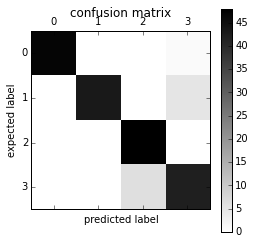

In [76]:
plt.matshow(confusion_matrix(messages['label'], all_predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

#가우시안 분류를 통한 결과는 다음과 같습니다
## 분류1과 분류2는 비교적 정확하고, 분류3과 분류4는 1,2에 비해선 상대적으로 부정확합니다

In [82]:
print classification_report(messages['label'], all_predictions)

             precision    recall  f1-score   support

          1       1.00      0.98      0.99        48
          2       1.00      0.90      0.95        48
          3       0.89      1.00      0.94        48
          4       0.88      0.88      0.88        48

avg / total       0.94      0.94      0.94       192



# 2. kNN (k=1, 3, 5 등)

In [84]:
from sklearn import neighbors, datasets

In [672]:
X=messages.loc[:,'A':'H']

In [335]:
X

,A,B,C,D,E,F,G,H
0,11,11,5,6,10,10,5,5
1,9,6,5,6,9,10,5,6
2,7,7,7,6,8,11,6,5
3,6,12,13,5,8,12,5,6
4,10,12,11,4,9,11,2,4
5,3,11,3,4,10,11,3,2
6,6,6,6,6,10,10,5,5
7,5,6,11,5,10,11,4,4
8,5,6,11,7,10,11,4,5
9,10,12,12,4,9,12,1,3


In [336]:
y=messages['label']

In [337]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
162    4
163    4
164    4
165    4
166    4
167    4
168    4
169    4
170    4
171    4
172    4
173    4
174    4
175    4
176    4
177    4
178    4
179    4
180    4
181    4
182    4
183    4
184    4
185    4
186    4
187    4
188    4
189    4
190    4
191    4
Name: label, dtype: int64

# N=1로 지정하였을 경우

In [338]:
clf=neighbors.KNeighborsClassifier(n_neighbors=1)

In [339]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

In [340]:
Z=clf.predict(X)

In [341]:
Z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int64)

In [342]:
accuracy=clf.score(X,y)

In [343]:
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 1.0


# 예측 모델 정확도 1 (n=1일경우)

In [344]:
A=np.vstack([y, Z])

In [345]:
print(A)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4]]


# N=3으로 가정하였을 경우

In [346]:
clf=neighbors.KNeighborsClassifier(n_neighbors=3)

In [347]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [348]:
Z=clf.predict(X)

In [349]:
Z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 1, 4, 4, 4, 4, 4], dtype=int64)

In [350]:
accuracy=clf.score(X,y)

In [351]:
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.979166666667


#N=3으로 하였을 경우 예측 모델 정확도 약 0.979167

In [352]:
A=np.vstack([y, Z])

In [353]:
print(A)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 4 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4
  4 1 4 4 4 4 4]]


#N=5로 가정하였을 경우

In [354]:
clf=neighbors.KNeighborsClassifier(n_neighbors=5)

In [355]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [356]:
Z=clf.predict(X)

In [357]:
Z

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 1, 4, 4, 4, 4, 4], dtype=int64)

In [358]:
accuracy=clf.score(X,y)

In [359]:
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.973958333333


#N=5로 가정하였을 경우 예측 정확도 약 0.97396

In [360]:
A=np.vstack([y, Z])

In [361]:
print(A)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 4 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4
  4 1 4 4 4 4 4]]


#N=10으로 가정하였을 경우

In [362]:
clf=neighbors.KNeighborsClassifier(n_neighbors=10)

In [363]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')

In [364]:
Z=clf.predict(X)

In [365]:
Z

array([4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4,
       4, 4, 1, 4, 1, 4, 4, 4], dtype=int64)

In [366]:
accuracy=clf.score(X,y)

In [367]:
print ("Predicted model accuracy: "+ str(accuracy))

Predicted model accuracy: 0.947916666667


#N=10으로 가정하였을 경우 정확도 약 0.949167

In [368]:
A=np.vstack([y, Z])

In [369]:
print(A)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4]
 [4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 4 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 4 4 4
  4 1 4 1 4 4 4]]


#3. 3-layer Neural Network Classifier (구조: 8-10-4) 

# 4. SVM(Support Vector Machine)

In [447]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
%matplotlib inline 

In [448]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=3,shuffle=True)
    y_pred = y.copy()
    
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [449]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import average_precision_score

In [462]:
scaler=StandardScaler()
Xs=scaler.fit_transform(X)

In [463]:
Xs

array([[ 1.79425708,  1.38200259, -0.75749459, ...,  0.72571789,
        -0.09652882, -0.39305264],
       [ 0.86318314, -0.54078362, -0.75749459, ...,  0.72571789,
        -0.09652882, -0.06916377],
       [-0.06789081, -0.15622638,  0.04603558, ...,  1.05357162,
         0.22862088, -0.39305264],
       ..., 
       [ 1.32872011, -0.92534087,  0.44780067, ...,  0.39786416,
        -0.09652882,  0.90250284],
       [ 1.79425708, -0.15622638, -1.15925968, ...,  0.39786416,
        -0.42167851,  0.2547251 ],
       [ 0.39764616, -0.15622638,  1.25133084, ...,  0.39786416,
         0.87892027,  0.57861397]])

In [465]:
def accuracy(y_true,y_pred):
    # NumPy interpretes True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(y, run_cv(Xs,y,SVC))

Support vector machines:
0.938


#SVM의 정확도는 0.938

# 5. k-means clustering (# of clusters = 4, class label은 모른다고 가정)

In [677]:
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans

In [678]:
XT=X.T

In [745]:
numTerms=4
numTerms

4

In [746]:
NDocs=192
NDocs

192

In [747]:
DF = np.array([(XT!=0).sum(0)])
DF

array([[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]], dtype=int64)

In [748]:
NMatrix=np.ones(np.shape(XT), dtype=float)*NDocs
NMatrix

array([[ 192.,  192.,  192., ...,  192.,  192.,  192.],
       [ 192.,  192.,  192., ...,  192.,  192.,  192.],
       [ 192.,  192.,  192., ...,  192.,  192.,  192.],
       ..., 
       [ 192.,  192.,  192., ...,  192.,  192.,  192.],
       [ 192.,  192.,  192., ...,  192.,  192.,  192.],
       [ 192.,  192.,  192., ...,  192.,  192.,  192.]])

In [749]:
IDF=np.log2(np.divide(NMatrix,DF))
IDF

array([[ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58],
       [ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58],
       [ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58],
       ..., 
       [ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58],
       [ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58],
       [ 4.58,  4.58,  4.58, ...,  4.58,  4.58,  4.58]])

In [750]:
np.set_printoptions(precision=2,suppress=True)

In [751]:
IDF[0:2,]

array([[ 4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
         4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,  4.58,
      

In [752]:
XT_tfidf=XT*IDF

In [753]:
XT_tfidf

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
A,50.434588,41.264663,32.094738,27.509775,45.849625,13.754888,27.509775,22.924813,22.924813,45.849625,...,50.434588,45.849625,36.679700,27.509775,41.264663,45.849625,41.264663,45.849625,50.434588,36.679700
B,50.434588,27.509775,32.094738,55.019550,55.019550,50.434588,27.509775,27.509775,27.509775,55.019550,...,36.679700,45.849625,18.339850,22.924813,50.434588,41.264663,45.849625,22.924813,32.094738,32.094738
C,22.924813,22.924813,32.094738,59.604513,50.434588,13.754888,27.509775,50.434588,50.434588,55.019550,...,22.924813,27.509775,27.509775,27.509775,50.434588,45.849625,50.434588,36.679700,18.339850,45.849625
D,27.509775,27.509775,27.509775,22.924813,18.339850,18.339850,27.509775,22.924813,32.094738,18.339850,...,18.339850,36.679700,18.339850,32.094738,36.679700,36.679700,32.094738,13.754888,22.924813,32.094738
E,45.849625,41.264663,36.679700,36.679700,41.264663,45.849625,45.849625,45.849625,45.849625,41.264663,...,45.849625,45.849625,36.679700,41.264663,45.849625,45.849625,41.264663,41.264663,50.434588,45.849625
F,45.849625,45.849625,50.434588,55.019550,50.434588,50.434588,45.849625,50.434588,50.434588,55.019550,...,36.679700,45.849625,41.264663,45.849625,50.434588,45.849625,50.434588,41.264663,41.264663,41.264663
G,22.924813,22.924813,27.509775,22.924813,9.169925,13.754888,22.924813,18.339850,18.339850,4.584963,...,9.169925,22.924813,32.094738,36.679700,18.339850,18.339850,9.169925,22.924813,18.339850,36.679700
H,22.924813,27.509775,22.924813,27.509775,18.339850,9.169925,22.924813,18.339850,22.924813,13.754888,...,27.509775,13.754888,45.849625,27.509775,13.754888,32.094738,32.094738,41.264663,32.094738,36.679700


In [796]:
centroids_tfidf=KMeans(4,2,XT_tfidf)

In [797]:
centroids_tfidf

KMeans(copy_x=True, init=2, max_iter=300, n_clusters=4,
    n_init=         0          1          2          3          4          5    \
A  50.434588  41.264663  32.094738  27.509775  45.849625  13.754888
B  50.434588  27.509775  32.094738  55.019550  55.019550  50.434588
C  22.924813  22.924813  32.094738  59.604513  50.434588  13.754888
D  27.509...
G  22.924813  18.339850  36.679700
H  41.264663  32.094738  36.679700

[8 rows x 192 columns],
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#KMeans는 파이선에서 2차원일때는 plot형태로 출력이 가능한데 제시해주신 IMOX데이터같이 배열이 3차원이상일 때는 제공이 안되어 있는 듯 합니다.

# 한학기동안 패턴인식에 대해 알려주셔서 감사합니다. 이번 수업을 통해 전공과정에 많은 도움이 되었습니다.
